In [585]:
#%%

import os
import copy
import Blob_Detector as blob
import numpy as np
import cv2
import yaml
import glob
from natsort import natsorted
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

INDEX = 9

In [586]:
#%%

params = blob.init_params()
print('Show Params')
for attr in dir(params):
    if not attr.startswith("_"):
        print(attr, "=", getattr(params, attr))

with open("blob_detector_params.yaml", "r") as file:
    loaded_params = yaml.safe_load(file)

for attr, value in loaded_params.items():
    if hasattr(params, attr):
        setattr(params, attr, value)

Show Params
blobColor = 0
collectContours = False
filterByArea = True
filterByCircularity = False
filterByColor = True
filterByConvexity = True
filterByInertia = True
maxArea = 5000.0
maxCircularity = 3.4028234663852886e+38
maxConvexity = 3.4028234663852886e+38
maxInertiaRatio = 3.4028234663852886e+38
maxThreshold = 220.0
minArea = 25.0
minCircularity = 0.800000011920929
minConvexity = 0.949999988079071
minDistBetweenBlobs = 10.0
minInertiaRatio = 0.10000000149011612
minRepeatability = 2
minThreshold = 50.0
thresholdStep = 10.0


In [587]:
#%%

def clone_params(source_params):
    cloned = cv2.SimpleBlobDetector_Params()
    for attr in dir(source_params):
        if not attr.startswith("_") and hasattr(source_params, attr):
            setattr(cloned, attr, getattr(source_params, attr))
    return cloned

In [588]:
#%%

# Define the parameter sets with associated colors
param_sets = []

# Parameter Set 1
params1 = clone_params(params)
param_sets.append((params1, (255, 0, 0), 'Default'))  # Red default settings

# Parameter Set 2
params2 = clone_params(params)
params2.minConvexity = 0.5
param_sets.append((params2, (0, 255, 0), 'minConvex=0.5'))  # Green

# Parameter Set 3
params3 = clone_params(params)
params3.minConvexity = 0.8
param_sets.append((params3, (0, 0, 255), 'minConvex=0.8'))  # Blue

In [589]:
# %%

input_path="C:\\Users\\festi\\Documents\\ISP\\MoleDetector-master\\dlib_test/*"
output_path="C:\\Users\\festi\\Documents\\ISP\\MoleDetector-master\\dlib_test\\minConvex/"
if not os.path.exists(output_path):
    os.makedirs(output_path)
# predictor_path = 'C:\\Users\\festi\\Downloads\\shape_predictor_68_face_landmarks.dat'

images=natsorted(glob.glob(input_path))
print("Current Image")
print(images[INDEX])
image = cv2.imread(images[INDEX])

if(images[INDEX][-7:-6] == '\\'):
    idx = -6
if(images[INDEX][-8:-7] == '\\'):
    idx = -7

overlay = np.copy(image)

Current Image
C:\Users\festi\Documents\ISP\MoleDetector-master\dlib_test\66.jpg


In [590]:
# %%

img = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
img[:, :, :] = image[:, :, :]
im = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
im[:, :, :] = 0 ## stores image after blur
im = cv2.GaussianBlur(img, (3, 3), 1) # original (5,5)

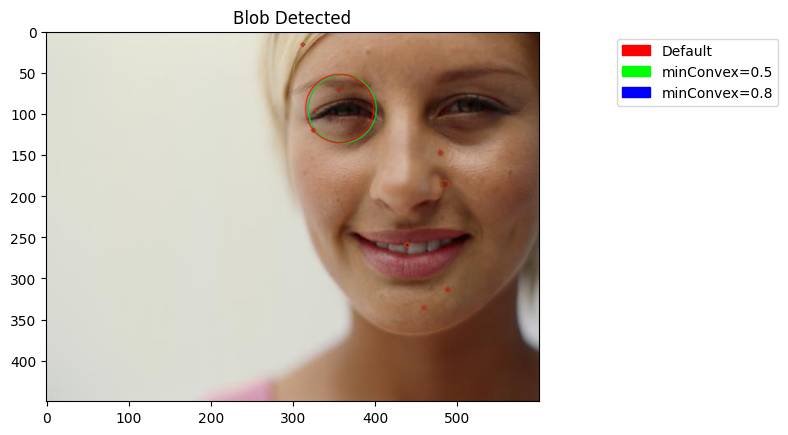

In [591]:
# %%

# keypoints = detector.detect(im)
# image_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
#                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# if len(image_with_keypoints.shape) == 3:  # If image has 3 channels
#     image_with_keypoints = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

legend_patches = []

# Loop through each parameter set
for params, color, label in param_sets:
    # Create a blob detector for this parameter set
    detector = blob.init(params)
    
    # Detect keypoints
    keypoints = detector.detect(image)
    
    # Draw the keypoints on the overlay with the given color
    overlay = cv2.drawKeypoints(overlay, keypoints, np.array([]), color, 
                                cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    if len(overlay.shape) == 3:
        overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    
    legend_patches.append(mpatches.Patch(color=np.array(color) / 255.0, label=label))

# Display the image using Matplotlib
plt.imshow(overlay)
plt.title("Blob Detected")
plt.legend(handles=legend_patches, loc="upper right", fontsize=10, frameon=True, bbox_to_anchor=(1.5, 1))
plt.savefig(output_path + images[INDEX][idx:], dpi=600, bbox_inches='tight')
plt.show()

In [592]:
for params, color, label in param_sets:
    print(color)
    print('Show Params')
    for attr in dir(params):
        if not attr.startswith("_"):
            print(attr, "=", getattr(params, attr))

(255, 0, 0)
Show Params
blobColor = 0
collectContours = False
filterByArea = True
filterByCircularity = True
filterByColor = True
filterByConvexity = True
filterByInertia = True
maxArea = 10000.0
maxCircularity = 3.4028234663852886e+38
maxConvexity = 3.4028234663852886e+38
maxInertiaRatio = 3.4028234663852886e+38
maxThreshold = 220.0
minArea = 1.0
minCircularity = 0.4000000059604645
minConvexity = 0.10000000149011612
minDistBetweenBlobs = 1.0
minInertiaRatio = 0.20000000298023224
minRepeatability = 2
minThreshold = 50.0
thresholdStep = 10.0
(0, 255, 0)
Show Params
blobColor = 0
collectContours = False
filterByArea = True
filterByCircularity = True
filterByColor = True
filterByConvexity = True
filterByInertia = True
maxArea = 10000.0
maxCircularity = 3.4028234663852886e+38
maxConvexity = 3.4028234663852886e+38
maxInertiaRatio = 3.4028234663852886e+38
maxThreshold = 220.0
minArea = 1.0
minCircularity = 0.4000000059604645
minConvexity = 0.5
minDistBetweenBlobs = 1.0
minInertiaRatio = 0.20